# Inverting Regressions y~f(x) Yielding Sub-optimial Estimators for x~g(y)

I've encountered an analysis to model (for prediction) some dependent variable y from some independent variable x. In this analysis, it was apparent that a best-fit regression (using an OLS solution) was fit treating x as the dependent variable, and y as the dependent variable. It seems intuitive that one can invert a univatiate regression $ y=b_1*x+b_0 $ into $ x = \frac{1}{b_1}*y - \frac{b_0}{b_1}$, but the estimator obtained is not equivalent to the estimator obtained when fitting $ y = b_3*x + b_2 $ directly, i.e. it can be shown via demonstration and proof that $ b_3 \neq \frac{1}{b_1} $ and $ b_2 \neq - \frac{b_0}{b_1} $ (but only one of these needs to be shown). In summary, if a model is intended to predict a dependent variable y, the model should be fit with respect to the cost of predicting that variable, not with respect to the cost of predicting an independent variable and subsequently rearranging. 

## Mathematical Proof $ b_3 \neq \frac{1}{b_1} $

Consider two regressions:  

$$ 
y=b_1*x+b_0 \\  
x=b_3*y+b_2 $$ 

With cost functions:

$$ SSE_1 = .5 \sum(y - b_1*x - b_0)^2 \\ 
 SSE_2 = .5 \sum(x - b_3*y - b_2)^2$$  

By evaluating the first partial derivatives of the above, two systems of normal equations emerge to solve for all four coefficients:  

$$
Normals_{SSE_1} = 
\begin{cases} 
    \sum y = b_1*\sum x + b_0*n \\ 
    \sum x*y = b_1*\sum x^2 + b_0*\sum x \\ 
\end{cases} \\

Normals_{SSE_2} = 
\begin{cases} 
    \sum x = b_3*\sum y + b_2*n \\ 
    \sum x*y = b_3*\sum y^2 + b_2*\sum y \\ 
\end{cases}
$$

Notations for convenience:  

$$
\sum x = S_x, \sum y = S_y, \sum xy = S_{xy}, \sum x^2 = S_{xx}, \sum y^2 = S_{yy}, 
$$  

Normal equations become:  
$$
Normals_{SSE_1} = 
\begin{cases} 
    S_y = b_1*S_x + b_0*n \\ 
    S_{xy} = b_1*S_{xx} + b_0*S_x \\ 
\end{cases} \\

Normals_{SSE_2} = 
\begin{cases} 
    S_x = b_3*S_y + b_2*n \\ 
    S_{xy} = b_3*S_{yy} + b_2*S_y \\ 
\end{cases}
$$

Intercept solutions in terms of slopes become:  
$$ 
b_0 = \frac{S_y - b_1*S_x}{n} \\ 

b_2 = \frac{S_x - b_3*S_y}{n} $$

By substitution, slope solutions become:  
$$
S_{xy} = b_1*S_{xx} + \frac{S_y - b_1*S_x}{n}*S_x  \\  
\rightarrow b_1 = \frac{n*S_{xy}-S_yS_x}{n*S_{xx}-S_xS_x}
$$   
$$
S_{xy} = b_3*S_{yy} + \frac{S_x - b_3*S_y}{n}*S_y  \\  
\rightarrow b_3 = \frac{n*S_{xy}-S_yS_x}{n*S_{yy}-S_yS_y}
$$

With solution for $b_3$ and $b_1$, substitutions can be made to solve for $b_2$ and $b_0$, but it suffices to show $b_3 \neq \frac{1}{b_1}$. Note that solutions for $b_3$ and $b_1$ can be stated in terms of the covariance of x and y, and the variance of x and y each:  

$$
b_1 = \frac{n*S_{xy}-S_yS_x}{n*S_{xx}-S_xS_x} = \frac{cov(x,y)}{var(x)}  \\
b_3 = \frac{n*S_{xy}-S_yS_x}{n*S_{yy}-S_yS_y} = \frac{cov(x,y)}{var(y)}
$$

State $b_3$ in terms of $b_1$:  

$$
b_3 = \frac{cov(x,y)}{var(y)} = \frac{cov(x,y)}{var(x)} * \frac{var(x)}{var(y)} = b_1 * \frac{var(x)}{var(y)}
$$  

Note that $b_3$ and $b_1$ do have a relationship, but not the inverse relationship needed. Show $b_1 * \frac{var(x)}{var(y)}$ does not equal the inverse of $b_1$:

$$
b_1 * \frac{var(x)}{var(y)} = \frac{1}{b_1} \rightarrow b_1^2 = \frac{var(y)}{var(x)} \rightarrow b_1 = \frac{std(y)}{std(x)}
$$

Here we have a contradiction. Coefficient $b_1$ is not defined by $\frac{std(y)}{std(x)}$. Therefore, the OLS regression $y = f(x)$, when inverted to $x = f^{-1}(y)$, $f^{-1}(y)$ does not equal the OLS regression $x = g(y)$.

## Demonsration of Non-Invertability

In [1]:
import numpy as np
import matplotlib.pyplot as plt

A univariate regression dataset is generated with true coefficients. It is visualized below.

In [2]:
x = np.random.uniform(2,9,150)
y = 2.5*x + np.random.normal(4,3,150)

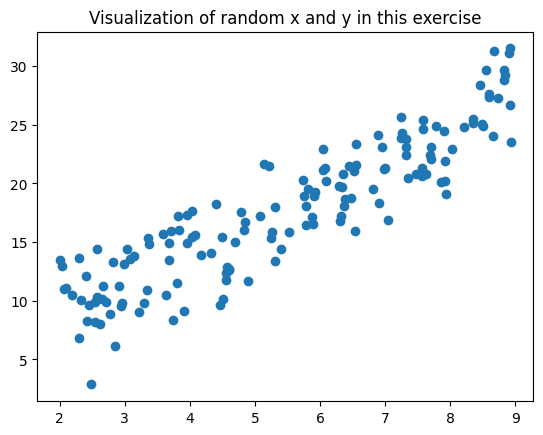

In [3]:
plt.scatter(x,y)
plt.title('Visualization of random x and y in this exercise')
plt.show()

Below, OLS regression computes estimates for the coefficients. They closely reflect the coefficients used to generate the data. 

Coefficients b_0,b_1: [3.49893875 2.59697442]


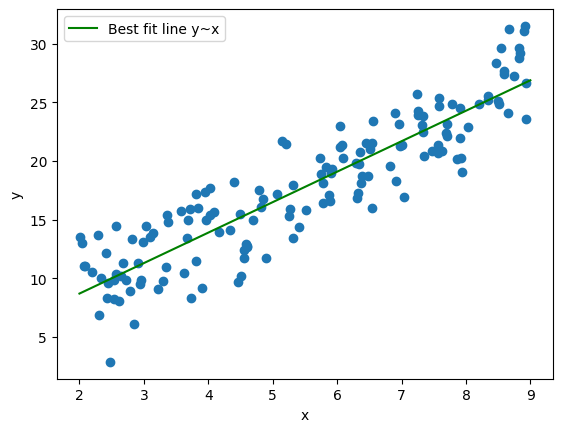

In [4]:
# coefficient estimates of y = b1*x+b0
# these closely reflect the true values of the regression, 4 and 2.5
X = np.concatenate(
    [
        np.ones((len(x),1)),
        x.reshape((len(x),1))
    ],axis=1)

coefs1 = np.linalg.inv(X.T@X)@(X.T@y)
print("Coefficients b_0,b_1:",coefs1)

plt.scatter(x,y)
pred =  np.concatenate(
    [
        np.ones((8,1)),
        np.linspace(2,9,8).reshape((8,1))
    ],axis=1)@coefs1
plt.plot(np.linspace(2,9,8), 
         pred, color='green', label='Best fit line y~x')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

If the linear model was rearranged from $ y=b_1*x+b_0 $ into $ x = \frac{1}{b_1}*y - \frac{b_0}{b_1}$, the intercept and slope of this rearrangement are evaluated as so:

Inverted intercept and slope of y~x: [-1.34731352  0.38506348]


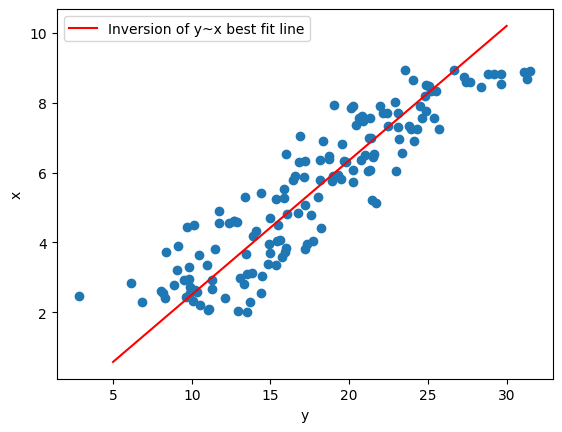

In [5]:
# expected inverted coefficients

coef20_expected = -coefs1[0]/coefs1[1]
coef21_expected = 1/coefs1[1]
coefs2_expected = np.array(
    [coef20_expected,coef21_expected]
)
print("Inverted intercept and slope of y~x:",coefs2_expected)

pred_false =  np.concatenate(
    [
        np.ones((26,1)),
        np.linspace(5,30,26).reshape((26,1))
    ],axis=1)@coefs2_expected
plt.plot(np.linspace(5,30,26), 
         pred_false, color='red', label='Inversion of y~x best fit line')
plt.xlabel('y')
plt.ylabel('x')
plt.legend()
plt.scatter(y,x)
plt.show()

By fitting $x=b_3*y+b_2$, it can be shown the regressions differ visibly in slope and intercept.

[-0.10728684  0.31501607]


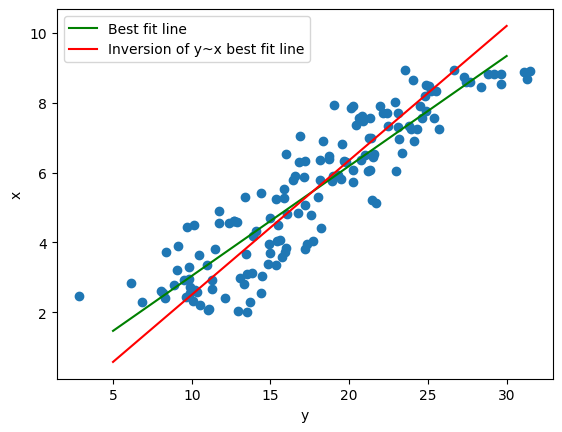

In [6]:
# coefficient estimates of x = b3*y+b2
# these are very different from the rearrangement of the first regression

Y = np.concatenate(
    [
        np.ones((len(x),1)),
        y.reshape((len(x),1))
    ],axis=1)

coefs2 = np.linalg.inv(Y.T@Y)@(Y.T@x)
print(coefs2)


pred =  np.concatenate(
    [
        np.ones((26,1)),
        np.linspace(5,30,26).reshape((26,1))
    ],axis=1)@coefs2
plt.plot(np.linspace(5,30,26), 
         pred, color='green', label='Best fit line')
plt.plot(np.linspace(5,30,26), 
         pred_false, color='red', label='Inversion of y~x best fit line')
plt.legend()
plt.xlabel('y')
plt.ylabel('x')
plt.scatter(y,x)
plt.show()

## Takeaway

It is important, when the objective is to predict a dependent variable's outcome, that a model is optimized with respect to that dependent variable. Fitting a trendline in the domain of the independent variable and inverting it, when there are non-zero residuals (as would nearly always be the case), does not give an optimal estimator in the dependent variable's domain.